<a href="https://colab.research.google.com/github/blottb7/NicerOdds_Scraper/blob/master/Insurance_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center">
  <img alt="AIcrowd" src="https://gitlab.aicrowd.com/jyotish/pricing-game-notebook-scripts/raw/master/pricing-game-banner.png">
</div>

# How to use this notebook 📝

1. **Copy the notebook**. This is a shared template and any edits you make here will not be saved. _You should copy it into your own drive folder._ For this, click the "File" menu (top-left), then "Save a Copy in Drive". You can edit your copy however you like.
2. **Link it to your AICrowd account**. In order to submit your code to AICrowd, you need to provide your account's API key (see [_"Configure static variables"_](#static-var) for details).
3. **Stick to the function definitions**. The submission to AICrowd will look for the pre-defined function names:
  - `fit_model`
  - `save_model`
  - `load_model`
  - `predict_expected_claim`
  - `predict_premium`

    Anything else you write outside of these functions will not be part of the final submission (including constants and utility functions), so make sure everything is defined within them, except for:
4. **Define your preprocessing**. In addition to the functions above, anything in the cell labelled [_"Define your data preprocessing"_](#data-preprocessing) will also be imported into your final submission. 

# Your pricing model 🕵️

In this notebook, you can play with the data, and define and train your pricing model. You can then directly submit it to the AICrowd, with some magic code at the end.

### Baseline logistic regression 💪
You can also play with a baseline logistic regression model [implemented here](https://colab.research.google.com/drive/1iDgDgWUw9QzOkbTYjeyY3i3DGuCoghs3?usp=sharing). 

# Setup the notebook 🛠

In [ ]:
!bash <(curl -sL https://gitlab.aicrowd.com/jyotish/pricing-game-notebook-scripts/raw/master/python/setup.sh)
from aicrowd_helpers import *

⚙️ Installing AIcrowd utilities...
  Running command git clone -q https://gitlab.aicrowd.com/yoogottamk/aicrowd-cli /tmp/pip-req-build-t5kulups
✅ Installed AIcrowd utilities


# Configure static variables 📎
<a name="static-var"></a>

In order to submit using this notebook, you must visit this URL https://aicrowd.com/participants/me and copy your API key. 

Then you must set the value of `AICROWD_API_KEY` wuth the value.

In [ ]:
import sklearn

class Config:
  TRAINING_DATA_PATH = 'training.csv'
  MODEL_OUTPUT_PATH = 'model.pkl'
  AICROWD_API_KEY = '108a93b8b66b6039d030914a696c9c0c'  # You can get the key from https://aicrowd.com/participants/me
  ADDITIONAL_PACKAGES = [
    'numpy',  # you can define versions as well, numpy==0.19.2
    'pandas',
    'scikit-learn==' + sklearn.__version__,
  ]

# Download dataset files 💾

In [ ]:
%download_aicrowd_dataset

💾 Downloading dataset...
Verifying API Key...
API Key valid
Saved API Key successfully!
✅ Downloaded dataset


# Packages 🗃

<a name="packages"></a>

Import here all the packages you need to define your model. **You will need to include all of these packages in `Config.ADDITIONAL_PACKAGES` for your code to run properly once submitted.**

In [ ]:
%%track_imports

import numpy as np
import pandas as pd
import pickle

In [ ]:
import importlib
import global_imports
importlib.reload(global_imports)
from global_imports import *  # do not change this

In [ ]:
# keep track of packages added (not default) here
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

import math

# Loading the data 📲

In [ ]:
df = pd.read_csv(Config.TRAINING_DATA_PATH)
X_train = df.drop(columns=['claim_amount'])
y_train = df['claim_amount']

## How does the data look like? 🔍

In [ ]:
X_train.sample(n=4)

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,drv_age2,drv_age_lic2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area
127778,PL059905,3.0,0.000,Max,3,3,Yearly,No,Retired,M,68.0,49.0,No,0,NaN,NaN,svmjzfcsvgxiwwjt,20.0,Gasoline,Tourism,180.0,22057.0,1245.0,370.0,358.4
160773,PL077289,3.0,0.151,Max,8,3,Monthly,No,WorkPrivate,M,35.0,17.0,No,0,NaN,NaN,xaklvfxsplowrglp,7.0,Diesel,Tourism,196.0,24750.0,1200.0,10.0,72.8
56170,PL014966,1.0,0.000,Max,13,3,Yearly,No,WorkPrivate,M,64.0,46.0,Yes,M,29.0,11.0,biqzvbfzjivqmrro,2.0,Diesel,Tourism,140.0,1113.0,393.0,1790.0,306.2
125812,PL061038,3.0,0.000,Max,5,4,Monthly,No,WorkPrivate,M,44.0,26.0,Yes,F,34.0,15.0,jrwdpzrmxqlzzepk,14.0,Diesel,Tourism,168.0,18310.0,1538.0,50.0,155.1


In [ ]:
y_train.sample(n=4)

142106    0.0
217362    0.0
23939     0.0
53486     0.0
Name: claim_amount, dtype: float64

In [ ]:
# len(X_train.id_policy.unique())

# Training the model 🚀

You must first define your first function: `fit_model`. This function takes training data as arguments, and outputs a "model" object -- that you define as you wish. For instance, this could be an array of parameter values.

## Define your data preprocessing

<a name="data-preprocessing"></a>

You can add any class or function in this cell for preprocessing. Just make sure that you use the functions here in the `fit_model`, `predict_expected_claim` and `predict_premium` functions if necessary. *italicised text*

In [ ]:
# Write out pseudocode for entire preprocessing pipeline here

# Deal with missing data

# replace 'bad' data:
#   drv_sex2 should have 3 values: M, F, or NaN (the age is not 0)

# conditional NaN's:
# drv_age2 and drv_age_lic2 have NaN's where drv_drv2 = No. Figure out how to deal with these

# Impute:
# vh_speed, vh_value, vh_weight, vh_age all have missing values.
# impute NaN's for each with best method; consider their distrubitions

# Outliers
# Plot distribution of each variable with boxplots
# Consider dropping rows with outliers
# See how many rows would be dropped

# Scaling:
# Pick which columns need to be scaled
# Scale each with most appropriate method (Robust, Normal, Standard, etc.)

# Encoding
# For vars with two classes, use LabelEncoder
# For categorical vars with more than two classes, use OHE
# Consider whether to drop a column or not
# Consider what to do with vh_make_model; will create ~900 new encoded columns

# Balancing
# In most scenarios, no claim is made
# On the second iteration of the model, consider whether to have a categorical outcome: claim or not
# As is, no balancing needs to be done.

# Discretizing (binning)
# I believe this is the type of step to win a competition; as well, it is the type of step
# that takes you from ok at data science to sought after.
# For example, muscle cars (super power cars like a Mustang) could be a bin

# Feature engineering
# Like binning, this could be a game changer
# However, it is not for an initial model

# Permutation importance
# Decide which features are predictive
# When feature engineering is done in the second iteration, do this again

In [ ]:
# X_train.tail()

In [ ]:
# X_train.isnull().sum()

In [ ]:
# X_train['drv_sex2'].unique()

In [ ]:
# # Write out pseudocode for entire preprocessing pipeline here

# # Deal with missing data
# X_train_copy = X_train
# y_train_copy = y_train

# # replace 'bad' data:
# #   drv_sex2 should have 3 values: M, F, or NaN (the age is not 0)
# X_train_copy['drv_sex2'] = X_train_copy['drv_sex2'].replace({'0':np.nan})
# # X_train_copy

# # conditional NaN's:
# # drv_age2 and drv_age_lic2 have NaN's where drv_drv2 = No. Figure out how to deal with these
# X_train_copy.drop(columns=['drv_sex2', 'drv_age2', 'drv_age_lic2'], inplace=True)
# X_train_copy

In [ ]:

# # Impute:
# # vh_speed, vh_value, vh_weight, vh_age all have missing values.
# # impute NaN's for each with best method; consider their distrubitions

# imputer = KNNImputer()

# X_train_copy['vh_speed'] = imputer.fit_transform(X_train_copy[['vh_speed']])
# X_train_copy['vh_value'] = imputer.fit_transform(X_train_copy[['vh_value']])
# X_train_copy['vh_weight'] = imputer.fit_transform(X_train_copy[['vh_weight']])
# X_train_copy['vh_age'] = imputer.fit_transform(X_train_copy[['vh_age']])
# # X_train_copy

In [ ]:
# X_train_copy.isnull().sum()

In [ ]:
# # Outliers
# # Plot distribution of each variable with boxplots
# # Consider dropping rows with outliers
# # See how many rows would be dropped

# # Scaling:
# # Pick which columns need to be scaled
# # Scale each with most appropriate method (Robust, Normal, Standard, etc.)
# scale_columns = ['pol_duration', 'pol_sit_duration', 'drv_age1', 'drv_age_lic1', 'vh_age', 'vh_speed', 'vh_value', 'vh_weight', 'population', 'town_surface_area']
# scale_columns

# robust_scaler = RobustScaler()
# X_train_copy[scale_columns] = robust_scaler.fit_transform(X_train_copy[scale_columns])
# X_train_copy

In [ ]:
# # Encoding
# # For vars with two classes, use LabelEncoder
# # from sklearn.preprocessing import LabelEncoder

# encode_columns = ['pol_payd','drv_sex1','drv_drv2','vh_type']

# le = LabelEncoder()

# X_train_copy[encode_columns] = X_train_copy[encode_columns].apply(le.fit_transform)
# # X_train_copy

In [ ]:
# # For categorical vars with more than two classes, use OHE or dummy vars
# encode_columns = ['pol_coverage', 'pol_pay_freq', 'pol_usage',
#                   'drv_drv2', 'vh_fuel']

# X_train_copy = pd.get_dummies(X_train_copy, columns=encode_columns)
# X_train_copy

In [ ]:
# # Consider whether to drop a column or not
# # Consider what to do with vh_make_model; will create ~900 new encoded columns

# # Balancing
# # In most scenarios, no claim is made
# # On the second iteration of the model, consider whether to have a categorical outcome: claim or not
# # As is, no balancing needs to be done.

# # Discretizing (binning)
# # I believe this is the type of step to win a competition; as well, it is the type of step
# # that takes you from ok at data science to sought after.
# # For example, muscle cars (super power cars like a Mustang) could be a bin

# # Feature engineering
# # Like binning, this could be a game changer
# # However, it is not for an initial model

# # Permutation importance
# # Decide which features are predictive
# # When feature engineering is done in the second iteration, do this again

# # just take the first year of the dataset
# X_train_yr1 = X_train_copy[X_train_copy['year']==1]
# X_train_yr1

In [ ]:
# y_train_yr1 = y_train_copy[:len(X_train_yr1),]
# y_train_yr1

In [ ]:
%%aicrowd_include
# This magical command saves all code in this cell to a utils module.

def preprocess_X_data(X):

  # replace 'bad' data:
  # drv_sex2 should have 3 values: M, F, or NaN (the age is not 0)
  X['drv_sex2'] = X['drv_sex2'].replace({'0':np.nan})

  # conditional NaN's:
  # drv_age2 and drv_age_lic2 have NaN's where drv_drv2 = No. Figure out how to deal with these
  X.drop(columns=['drv_sex2', 'drv_age2', 'drv_age_lic2'], inplace=True)

  # Impute:
  # vh_speed, vh_value, vh_weight, vh_age all have missing values.
  # impute NaN's for each with best method; consider their distrubitions
  imputer = KNNImputer()

  X['vh_speed'] = imputer.fit_transform(X[['vh_speed']])
  X['vh_value'] = imputer.fit_transform(X[['vh_value']])
  X['vh_weight'] = imputer.fit_transform(X[['vh_weight']])
  X['vh_age'] = imputer.fit_transform(X[['vh_age']])

  # Scaling:
  # Pick which columns need to be scaled
  # Scale each with most appropriate method (Robust, Normal, Standard, etc.)
  scale_columns = ['pol_duration', 'pol_sit_duration', 'drv_age1', 'drv_age_lic1', 'vh_age', 'vh_speed', 'vh_value', 'vh_weight', 'population', 'town_surface_area']

  robust_scaler = RobustScaler()
  X[scale_columns] = robust_scaler.fit_transform(X[scale_columns])

  # Encoding
  # For vars with two classes, use LabelEncoder
  # from sklearn.preprocessing import LabelEncoder

  encode_columns = ['pol_payd','drv_sex1','drv_drv2','vh_type']

  le = LabelEncoder()

  X[encode_columns] = X[encode_columns].apply(le.fit_transform)

  # For categorical vars with more than two classes, use OHE or dummy vars
  encode_columns = ['pol_coverage', 'pol_pay_freq', 'pol_usage',
                  'drv_drv2', 'vh_fuel']

  X = pd.get_dummies(X, columns=encode_columns)

  return X

# include your preprocessing functions and classes here.

In [ ]:
X_train_preprocessed = preprocess_X_data(X_train)
X_train_preprocessed.head()

,id_policy,year,pol_no_claims_discount,pol_duration,pol_sit_duration,pol_payd,drv_sex1,drv_age1,drv_age_lic1,vh_make_model,vh_age,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_drv2_0,drv_drv2_1,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid
0,PL000000,1.0,0.332,-0.461538,-1.5,0,1,-0.954545,-0.90,aparvvfowrjncdhp,-0.222222,1,0.000000,-0.500615,0.000000,2.159091,-0.592233,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,PL042495,1.0,0.000,-0.384615,-1.5,0,1,0.181818,0.35,aparvvfowrjncdhp,0.000000,1,0.000000,-0.500615,0.000000,2.204545,-0.503883,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0
2,PL042496,1.0,0.196,-0.692308,-1.5,1,1,-0.045455,0.05,iwhqpdfuhrsxyqxe,-0.222222,0,-0.857143,-0.205729,0.138122,1.590909,0.522816,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
3,PL042497,1.0,0.000,-0.230769,0.5,0,0,-0.090909,-0.15,kvcddisqpkysmvvo,-0.666667,1,-0.892857,0.084901,-0.361878,-0.318182,0.313592,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0
4,PL042498,1.0,0.000,-0.692308,-1.0,0,0,0.409091,0.20,tdgkjlphosocwbgu,0.333333,1,0.928571,0.291860,0.475138,-0.659091,-0.411650,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
X_train_preprocessed

,id_policy,year,pol_no_claims_discount,pol_duration,pol_sit_duration,pol_payd,drv_sex1,drv_age1,drv_age_lic1,vh_make_model,vh_age,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_drv2_0,drv_drv2_1,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid
0,PL000000,1.0,0.332,-0.461538,-1.5,0,1,-0.954545,-0.90,aparvvfowrjncdhp,-0.222222,1,0.000000,-0.500615,0.000000,2.159091,-0.592233,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,PL042495,1.0,0.000,-0.384615,-1.5,0,1,0.181818,0.35,aparvvfowrjncdhp,0.000000,1,0.000000,-0.500615,0.000000,2.204545,-0.503883,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0
2,PL042496,1.0,0.196,-0.692308,-1.5,1,1,-0.045455,0.05,iwhqpdfuhrsxyqxe,-0.222222,0,-0.857143,-0.205729,0.138122,1.590909,0.522816,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
3,PL042497,1.0,0.000,-0.230769,0.5,0,0,-0.090909,-0.15,kvcddisqpkysmvvo,-0.666667,1,-0.892857,0.084901,-0.361878,-0.318182,0.313592,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0
4,PL042498,1.0,0.000,-0.692308,-1.0,0,0,0.409091,0.20,tdgkjlphosocwbgu,0.333333,1,0.928571,0.291860,0.475138,-0.659091,-0.411650,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228211,PL008818,4.0,0.087,-0.538462,0.0,0,0,-0.272727,-0.30,ubttjiaeeuwzcclq,0.555556,1,0.178571,-0.027229,-0.519337,1.613636,-0.290291,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0
228212,PL055033,4.0,0.000,0.230769,0.5,0,1,-0.727273,-0.60,gfhjqtkgvomiygvx,-0.555556,1,-1.250000,-0.411270,0.334254,-0.659091,-0.317961,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
228213,PL061619,4.0,0.181,-0.076923,0.0,0,0,0.681818,0.15,swjkmyqytzxjwgag,0.555556,1,0.035714,0.715231,0.392265,-0.068182,-0.237864,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
228214,PL060903,4.0,0.000,1.076923,5.5,0,1,-0.318182,-0.15,ponwkmeaxagundzq,2.333333,1,0.857143,0.346696,0.488950,-0.659091,-0.246117,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0


#### Deal with Missing Values

In [ ]:
# well over 50% of drv_age2 and drv_age_lic2 are missing, so it is best practice
# to drop them
X_train.drop(columns=['drv_age2', 'drv_age_lic2'], inplace=True)

In [ ]:
# from sklearn.impute import KNNImputer
# from sklearn.impute import SimpleImputer
imputer = KNNImputer()
# imputer = SimpleImputer(strategy='median')

In [ ]:
X_train['vh_speed'] = imputer.fit_transform(X_train[['vh_speed']])
X_train['vh_value'] = imputer.fit_transform(X_train[['vh_value']])
X_train['vh_weight'] = imputer.fit_transform(X_train[['vh_weight']])
X_train['vh_age'] = imputer.fit_transform(X_train[['vh_age']])

In [ ]:
# Check that there are no missing values
X_train.isnull().sum()

id_policy                 0
year                      0
pol_no_claims_discount    0
pol_coverage              0
pol_duration              0
pol_sit_duration          0
pol_pay_freq              0
pol_payd                  0
pol_usage                 0
drv_sex1                  0
drv_age1                  0
drv_age_lic1              0
drv_drv2                  0
drv_sex2                  0
vh_make_model             0
vh_age                    0
vh_fuel                   0
vh_type                   0
vh_speed                  0
vh_value                  0
vh_weight                 0
population                0
town_surface_area         0
dtype: int64

#### Scaling

In [ ]:
X_train.head()

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area
0,PL000000,1.0,0.332,Med2,5,1,Monthly,No,WorkPrivate,M,35.0,16.0,Yes,F,aparvvfowrjncdhp,8.0,Gasoline,Tourism,174.0,11040.0,1143.0,1270.0,33.1
1,PL042495,1.0,0.000,Med2,6,1,Monthly,No,WorkPrivate,M,60.0,41.0,No,0,aparvvfowrjncdhp,10.0,Diesel,Tourism,174.0,11040.0,1143.0,1290.0,51.3
2,PL042496,1.0,0.196,Med1,2,1,Yearly,Yes,Retired,M,55.0,35.0,Yes,F,iwhqpdfuhrsxyqxe,8.0,Diesel,Commercial,150.0,14159.0,1193.0,1020.0,262.8
3,PL042497,1.0,0.000,Med2,8,5,Yearly,No,WorkPrivate,F,54.0,31.0,No,0,kvcddisqpkysmvvo,4.0,Gasoline,Tourism,149.0,17233.0,1012.0,180.0,219.7
4,PL042498,1.0,0.000,Med1,2,2,Yearly,No,Retired,F,65.0,38.0,No,0,tdgkjlphosocwbgu,13.0,Gasoline,Tourism,200.0,19422.0,1315.0,30.0,70.3


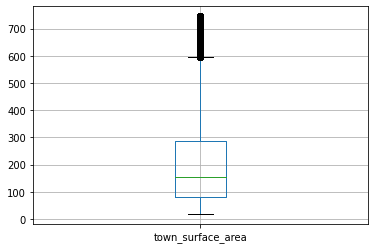

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plt.boxplot(X_train['pol_duration'])
X_train.boxplot(column=['town_surface_area'])  # alternative plot
plt.show()

In [ ]:
# Scale all using Robust for now
scale_columns = ['pol_duration', 'pol_sit_duration', 'drv_age1', 'drv_age_lic1', 'vh_age', 'vh_speed', 'vh_value', 'vh_weight', 'population', 'town_surface_area']
scale_columns

['pol_duration',
 'pol_sit_duration',
 'drv_age1',
 'drv_age_lic1',
 'vh_age',
 'vh_speed',
 'vh_value',
 'vh_weight',
 'population',
 'town_surface_area']

In [ ]:
df_copy = X_train

In [ ]:
# from sklearn.preprocessing import RobustScaler
# robust_scaler = RobustScaler()
df_copy[scale_columns] = robust_scaler.fit_transform(df_copy[scale_columns])
df_copy

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area
0,PL000000,1.0,0.332,Med2,-0.461538,-1.5,Monthly,No,WorkPrivate,M,-0.954545,-0.90,Yes,F,aparvvfowrjncdhp,-0.222222,Gasoline,Tourism,0.000000,-0.500615,0.000000,2.159091,-0.592233
1,PL042495,1.0,0.000,Med2,-0.384615,-1.5,Monthly,No,WorkPrivate,M,0.181818,0.35,No,0,aparvvfowrjncdhp,0.000000,Diesel,Tourism,0.000000,-0.500615,0.000000,2.204545,-0.503883
2,PL042496,1.0,0.196,Med1,-0.692308,-1.5,Yearly,Yes,Retired,M,-0.045455,0.05,Yes,F,iwhqpdfuhrsxyqxe,-0.222222,Diesel,Commercial,-0.857143,-0.205729,0.138122,1.590909,0.522816
3,PL042497,1.0,0.000,Med2,-0.230769,0.5,Yearly,No,WorkPrivate,F,-0.090909,-0.15,No,0,kvcddisqpkysmvvo,-0.666667,Gasoline,Tourism,-0.892857,0.084901,-0.361878,-0.318182,0.313592
4,PL042498,1.0,0.000,Med1,-0.692308,-1.0,Yearly,No,Retired,F,0.409091,0.20,No,0,tdgkjlphosocwbgu,0.333333,Gasoline,Tourism,0.928571,0.291860,0.475138,-0.659091,-0.411650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228211,PL008818,4.0,0.087,Med2,-0.538462,0.0,Monthly,No,WorkPrivate,F,-0.272727,-0.30,Yes,F,ubttjiaeeuwzcclq,0.555556,Diesel,Tourism,0.178571,-0.027229,-0.519337,1.613636,-0.290291
228212,PL055033,4.0,0.000,Max,0.230769,0.5,Monthly,No,WorkPrivate,M,-0.727273,-0.60,Yes,F,gfhjqtkgvomiygvx,-0.555556,Diesel,Tourism,-1.250000,-0.411270,0.334254,-0.659091,-0.317961
228213,PL061619,4.0,0.181,Max,-0.076923,0.0,Yearly,No,Retired,F,0.681818,0.15,No,0,swjkmyqytzxjwgag,0.555556,Gasoline,Tourism,0.035714,0.715231,0.392265,-0.068182,-0.237864
228214,PL060903,4.0,0.000,Max,1.076923,5.5,Biannual,No,Professional,M,-0.318182,-0.15,No,0,ponwkmeaxagundzq,2.333333,Diesel,Tourism,0.857143,0.346696,0.488950,-0.659091,-0.246117


#### Encoding

In [ ]:
# df[['drv_age2', 'drv_age_lic2', 'drv_drv2']]

In [ ]:
# inspect values
# len(df_copy.id_policy)
df_copy.vh_make_model.unique()
# len(df_copy.vh_make_model.unique())

In [ ]:
# Columns to encode
encode_columns = ['pol_coverage', 'pol_pay_freq', 'pol_payd', 'pol_usage',
                  'drv_sex1', 'drv_drv2', 'drv_sex2', #'vh_make_model',
                  'vh_fuel', 'vh_type']

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)
# pol_coverage_oh = ohe.fit_transform(df_copy[['pol_coverage']])
# pol_coverage_oh.T

In [ ]:
# pd.get_dummies(df_copy[['pol_coverage']])
encoded_columns = pd.get_dummies(df_copy[encode_columns])
encoded_columns
df_copy

,id_policy,year,pol_no_claims_discount,pol_coverage,pol_duration,pol_sit_duration,pol_pay_freq,pol_payd,pol_usage,drv_sex1,drv_age1,drv_age_lic1,drv_drv2,drv_sex2,vh_make_model,vh_age,vh_fuel,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area
0,PL000000,1.0,0.332,Med2,-0.461538,-1.5,Monthly,No,WorkPrivate,M,-0.954545,-0.90,Yes,F,aparvvfowrjncdhp,-0.222222,Gasoline,Tourism,0.000000,-0.500615,0.000000,2.159091,-0.592233
1,PL042495,1.0,0.000,Med2,-0.384615,-1.5,Monthly,No,WorkPrivate,M,0.181818,0.35,No,0,aparvvfowrjncdhp,0.000000,Diesel,Tourism,0.000000,-0.500615,0.000000,2.204545,-0.503883
2,PL042496,1.0,0.196,Med1,-0.692308,-1.5,Yearly,Yes,Retired,M,-0.045455,0.05,Yes,F,iwhqpdfuhrsxyqxe,-0.222222,Diesel,Commercial,-0.857143,-0.205729,0.138122,1.590909,0.522816
3,PL042497,1.0,0.000,Med2,-0.230769,0.5,Yearly,No,WorkPrivate,F,-0.090909,-0.15,No,0,kvcddisqpkysmvvo,-0.666667,Gasoline,Tourism,-0.892857,0.084901,-0.361878,-0.318182,0.313592
4,PL042498,1.0,0.000,Med1,-0.692308,-1.0,Yearly,No,Retired,F,0.409091,0.20,No,0,tdgkjlphosocwbgu,0.333333,Gasoline,Tourism,0.928571,0.291860,0.475138,-0.659091,-0.411650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228211,PL008818,4.0,0.087,Med2,-0.538462,0.0,Monthly,No,WorkPrivate,F,-0.272727,-0.30,Yes,F,ubttjiaeeuwzcclq,0.555556,Diesel,Tourism,0.178571,-0.027229,-0.519337,1.613636,-0.290291
228212,PL055033,4.0,0.000,Max,0.230769,0.5,Monthly,No,WorkPrivate,M,-0.727273,-0.60,Yes,F,gfhjqtkgvomiygvx,-0.555556,Diesel,Tourism,-1.250000,-0.411270,0.334254,-0.659091,-0.317961
228213,PL061619,4.0,0.181,Max,-0.076923,0.0,Yearly,No,Retired,F,0.681818,0.15,No,0,swjkmyqytzxjwgag,0.555556,Gasoline,Tourism,0.035714,0.715231,0.392265,-0.068182,-0.237864
228214,PL060903,4.0,0.000,Max,1.076923,5.5,Biannual,No,Professional,M,-0.318182,-0.15,No,0,ponwkmeaxagundzq,2.333333,Diesel,Tourism,0.857143,0.346696,0.488950,-0.659091,-0.246117


In [ ]:
# merge and drop
df_copy.merge(encoded_columns)
df_copy

MergeError: ignored

In [ ]:
ohe.get_feature_names

In [ ]:
import importlib
import utils
importlib.reload(utils)
from utils import *  # do not change this

## Define the training logic

In [ ]:
# Pseudocode for Modeling

# Create a baseline score (RMSE; this is what the competition uses).
# Do this with the Holdout Method

# Cross validate a regression model

# Collect the RMSE

In [ ]:
X_train_yr1.head()
# y_train_yr1.tail()

,pol_no_claims_discount,pol_duration,pol_sit_duration,pol_payd,drv_sex1,drv_age1,drv_age_lic1,vh_age,vh_type,vh_speed,vh_value,vh_weight,population,town_surface_area,pol_coverage_Max,pol_coverage_Med1,pol_coverage_Med2,pol_coverage_Min,pol_pay_freq_Biannual,pol_pay_freq_Monthly,pol_pay_freq_Quarterly,pol_pay_freq_Yearly,pol_usage_AllTrips,pol_usage_Professional,pol_usage_Retired,pol_usage_WorkPrivate,drv_drv2_0,drv_drv2_1,vh_fuel_Diesel,vh_fuel_Gasoline,vh_fuel_Hybrid
0,0.332,-0.461538,-1.5,0,1,-0.954545,-0.90,-0.222222,1,0.000000,-0.500615,0.000000,2.159091,-0.592233,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0
1,0.000,-0.384615,-1.5,0,1,0.181818,0.35,0.000000,1,0.000000,-0.500615,0.000000,2.204545,-0.503883,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0
2,0.196,-0.692308,-1.5,1,1,-0.045455,0.05,-0.222222,0,-0.857143,-0.205729,0.138122,1.590909,0.522816,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
3,0.000,-0.230769,0.5,0,0,-0.090909,-0.15,-0.666667,1,-0.892857,0.084901,-0.361878,-0.318182,0.313592,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0
4,0.000,-0.692308,-1.0,0,0,0.409091,0.20,0.333333,1,0.928571,0.291860,0.475138,-0.659091,-0.411650,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0


In [ ]:
# Pseudocode for Modeling

# Create a baseline score (RMSE; this is what the competition uses).
# Do this with the Holdout Method

# remove columns that I will not be regressing on
X_train_yr1 = X_train_yr1.drop(columns=['id_policy', 'year', 'vh_make_model'])
X_train_yr1

In [ ]:
# Cross validate a regression model
# from sklearn.model_selection import train_test_split
# from sklearn.dummy import DummyRegressor
# from sklearn.metrics import mean_squared_error
# import math

X_train_yr1_train, X_val_yr1, y_train_yr1_train, y_val_yr1 = train_test_split(X_train_yr1, y_train_yr1, test_size=.25, random_state=23)

# Collect the RMSE
baseline_model = DummyRegressor(strategy='mean')
baseline_model.fit(X_train_yr1_train, y_train_yr1_train)
baseline_model.score(X_val_yr1, y_val_yr1)
math.sqrt(mean_squared_error(y_val_yr1, baseline_model.predict(X_val_yr1)))

543.1483680213928

In [ ]:
# from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_yr1_train, y_train_yr1_train)
model.score(X_val_yr1, y_val_yr1)

0.013459595100834942

In [ ]:
# Now get a cross validated model
# from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X_train_yr1_train, y_train_yr1_train, cv=5)
cv_results
cv_results['test_score'].mean()

0.006883333405656766

In [ ]:
# get predicted values
y_pred = model.predict(X_val_yr1)
print(y_pred)

[ 85.38671875 176.98046875  34.49609375 ...  36.51171875  34.30859375
 153.57421875]


In [ ]:
# find RMSE
math.sqrt(mean_squared_error(y_val_yr1, y_pred))

539.4408345205159

In [ ]:
def fit_model(X_raw, y_raw):
    """Model training function: given training data (X_raw, y_raw), train this pricing model.

    Parameters
    ----------
    X_raw : Pandas dataframe, with the columns described in the data dictionary.
        Each row is a different contract. This data has not been processed.
    y_raw : a Numpy array, with the value of the claims, in the same order as contracts in X_raw.
        A one dimensional array, with values either 0 (most entries) or >0.

    Returns
    -------
    self: this instance of the fitted model. This can be anything, as long as it is compatible
        with your prediction methods.

    """

    # TODO: train your model here.
    # Don't forget any preprocessing of the raw data here

    return np.mean(y_raw)  # By default, training a model that returns a mean value (a mean model).

## Train your model

In [ ]:
trained_model = fit_model(X_train, y_train)

**Important note**: your training code should be able to run in under 10 minutes (since this notebook is re-run entirely on the server side). 

If you run into an issue here we recommend using the *zip file submission* (see the [challenge page](https://www.aicrowd.com/challenges/insurance-pricing-game/#how-to%20submit)). In short, you can simply do this by copy-pasting your `fit_model`, `predict_expected_claim` and `predict_premium` functions to the `model.py` file.

Note that if you want to perform extensive cross-validation/hyper-parameter selection, it is better to do them offline, in a separate notebook.

## Saving your model

You can save your model to a file here, so you don't need to retrain it every time.

In [ ]:
def save_model(model_path):
  with open(model_path, 'wb') as target_file:
      pickle.dump(trained_model, target_file)

In [ ]:
save_model(Config.MODEL_OUTPUT_PATH)

If you need to load it from file, you can use this code:

In [ ]:
def load_model(model_path):
  with open(model_path, 'rb') as target:
      return pickle.load(target)

In [ ]:
trained_model = load_model(Config.MODEL_OUTPUT_PATH)

# Predicting the claims 💵

The second function, `predict_expected_claim`, takes your trained model and a dataframe of contracts, and outputs a prediction for the (expected) claim incurred by each contract. This expected claim can be seen as the probability of an accident multiplied by the cost of that accident.

This is the function used to compute the _RMSE_ leaderboard, where the model best able to predict claims wins.

In [ ]:
def predict_expected_claim(model, X_raw):
    """Model prediction function: predicts the expected claim based on the pricing model.

    This functions estimates the expected claim made by a contract (typically, as the product
    of the probability of having a claim multiplied by the expected cost of a claim if it occurs),
    for each contract in the dataset X_raw.

    This is the function used in the RMSE leaderboard, and hence the output should be as close
    as possible to the expected cost of a contract.

    Parameters
    ----------
    model: a Python object that describes your model. This can be anything, as long
        as it is consistent with what `fit` outpurs.
    X_raw : Pandas dataframe, with the columns described in the data dictionary.
        Each row is a different contract. This data has not been processed.

    Returns
    -------
    avg_claims: a one-dimensional Numpy array of the same length as X_raw, with one
        expected claim per contract (in same order). These expected claims must be POSITIVE (>0).
    """

    # TODO: estimate the expected claim of every contract.
    # Don't forget any preprocessing of the raw data here
    
    return np.full( (len(X_raw.index),), model )  # Estimate that each contract will cost 114 (this is the naive mean model). You should change this!

To test your function, run it on your training data:

In [ ]:
predict_expected_claim(trained_model, X_train)

# Pricing contracts 💰💰

The third and final function, `predict_premium`, takes your trained model and a dataframe of contracts, and outputs a _price_ for each of these contracts. **You are free to set this prices however you want!** These prices will then be used in competition with other models: contracts will choose the model offering the lowest price, and this model will have to pay the cost if an accident occurs.

This is the function used to compute the _profit_ leaderboard: your model will participate in many markets of size 10, populated by other participants' model, and we compute the average profit of your model over all the markets it participated in.

In [ ]:
def predict_premium(model, X_raw):
    """Model prediction function: predicts premiums based on the pricing model.

    This function outputs the prices that will be offered to the contracts in X_raw.
    premium will typically depend on the average claim predicted in 
    predict_average_claim, and will add some pricing strategy on top.

    This is the function used in the average profit leaderboard. Prices output here will
    be used in competition with other models, so feel free to use a pricing strategy.

    Parameters
    ----------
    model: a Python object that describes your model. This can be anything, as long
        as it is consistent with what `fit` outpurs.
    X_raw : Pandas dataframe, with the columns described in the data dictionary.
        Each row is a different contract. This data has not been processed.

    Returns
    -------
    prices: a one-dimensional Numpy array of the same length as X_raw, with one
        price per contract (in same order). These prices must be POSITIVE (>0).
    """

    # TODO: return a price for everyone.
    # Don't forget any preprocessing of the raw data here

    return predict_expected_claim(model, X_raw)  # Default: price at the pure premium with no pricing strategy.

To test your function, run it on your training data.

In [ ]:
prices = predict_premium(trained_model, X_train)

#### Profit on training data

In order for your model to be considered in the profit competition, it needs to make nonnegative profit over its training set. You can check that your model satisfies this condition below:

In [ ]:
print('Income:', prices.sum())
print('Losses:', y_train.sum())

if prices.sum() < y_train.sum():
    print('Your model loses money on the training data! It does not satisfy market rule 1: Non-negative training profit.')
    print('This model will be disqualified from the weekly profit leaderboard, but can be submitted for educational purposes to the RMSE leaderboard.')
else:
    print('Your model passes the non-negative training profit test!')

# Ready? Submit to AIcrowd 🚀

If you are satisfied with your code, run the code below to send your code to the AICrowd servers for evaluation! This requires the variable `trained_model` to be defined by your previous code.

**Make sure you have included all packages needed to run your code in the [_"Packages"_](#packages) section.**

In [ ]:
%aicrowd_submit